# Coding exercises for Lecture 3: Mean Squared Error
## CMSE 381 - Spring 2023
## Jan 13, 2022

This notebook has some code to go along with lecture 3 on Mean Squared Error.

In [1]:
# As always, we start with our favorite standard imports. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Info about the data set 

From https://rdrr.io/cran/ISLR/man/Auto.html

### Auto: Auto Data Set


**Description**

Gas mileage, horsepower, and other information for 392 vehicles.
Usage


**Format**

A data frame with 392 observations on the following 9 variables.

- `mpg`: miles per gallon
- `cylinders`: Number of cylinders between 4 and 8
- `displacement`: Engine displacement (cu. inches)
- `horsepower`: Engine horsepower
- `weight`: Vehicle weight (lbs.)
- `acceleration`: Time to accelerate from 0 to 60 mph (sec.)
- `year`: Model year (modulo 100)
- `origin`: Origin of car (1. American, 2. European, 3. Japanese)
- `name`: Vehicle name

The orginal data contained 408 observations but 16 observations with missing values were removed.

**Source**

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition. 

In [2]:
# First, we're going to do all the data loading and cleanup we figured out last time.
auto = pd.read_csv('Auto.csv')
auto = auto.replace('?', np.nan)
auto = auto.dropna()
auto.horsepower = auto.horsepower.astype('int')
auto.shape


(392, 9)

I want to just predict acceleration using horsepower. 


&#9989; **<font color=red>Do this:</font>** Make a scatter plot of acceleration (the output varible) vs horsepower (the input variable). Does it look like there's a relationship between the two variables?  

In [3]:
# Your code here.

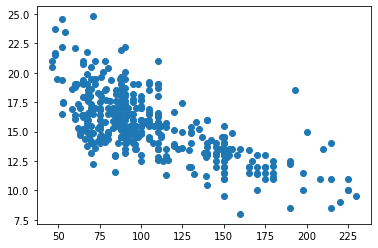

In [4]:
##ANSWER##
plt.scatter(auto.horsepower, auto.acceleration)
# sns.regplot(auto.horsepower, auto.acceleration)

I've decided to use the model 
$$
\hat f(\texttt{horsepower}) = 
23-0.05 \cdot \texttt{horsepower}
$$
&#9989; **<font color=red>Do this:</font>** Make a panda Series with entries $\hat f(\texttt{horsepower})$ for each entry in `auto.horsepower`. 

In [5]:
# Your code here

In [161]:
##ANSWER##
predicted = 23 - (0.05) * auto.horsepower
#print(predicted[:10])

[23.   11.75]


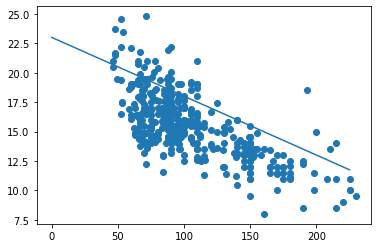

In [7]:
##ANSWER##
# Not what I asked, but here's a visual of the function we're using.

plt.scatter(auto.horsepower,auto.acceleration)
t = np.array([0, 225])
liney = -.05 * t + 23
print(liney)

plt.plot(t,liney)


&#9989; **<font color=red>Do this:</font>** Using the series you just built, calculated the mean squared error, 
$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat y_i)^2.
$$

In [8]:
# Your code here

In [164]:
##ANSWER##
print(predicted[:10])
sq_error =  (auto.acceleration - predicted) ** 2
#print(sq_error[:10])
MSE = np.sum(sq_error)/len(sq_error)
print(MSE)
#print(len(sq_error))

0    16.50
1    14.75
2    15.50
3    15.50
4    16.00
5    13.10
6    12.00
7    12.25
8    11.75
9    13.50
Name: horsepower, dtype: float64
8.982500000000002


Have some spare time? Can you mess around with the coefficients in your model to decrease the MSE?


In [116]:
# Your code here

x = 100
K = 4
dist = auto.horsepower - x
type(dist)

tmp = pd.DataFrame({
    'hp' : auto.horsepower, 
    'acc' : auto.acceleration
                   })
#tmp = tmp.iloc[0:100, ]

dat = tmp.sort_values(by = ['hp'])

a = abs(dat['hp'] - x)
knn_id = a.rank() < K + 1
knn_id
print(dat[knn_id])
y_hat = np.mean(dat[knn_id]['acc'])
#print(y_hat)
print(a.rank())
dat

Empty DataFrame
Columns: [hp, acc]
Index: []
19     349.5
102    349.5
326    344.5
325    344.5
244    344.5
       ...  
6      388.0
8      390.0
95     390.0
13     390.0
116    392.0
Name: hp, Length: 392, dtype: float64


,hp,acc
19,46,20.5
102,46,21.0
326,48,23.7
325,48,21.7
244,48,21.5
...,...,...
6,220,9.0
8,225,10.0
95,225,11.0
13,225,10.0


In [127]:
a = pd.DataFrame({'a' : [1, 1, 2, 3, 4]})
b = (a['a'].rank() < 1) 
sum(b)

0

### Let's try the KNN model from last class


In [140]:
def knn(dat_x, dat_y, x_new = 160, K = 4):
    tmp = pd.DataFrame({
        'hp' : dat_x, 
        'acc' : dat_y})
    dat = tmp.sort_values(by = ['hp'])
    a = abs(dat['hp'] - x_new) 
    knn_id = a.rank() < K + 1
    if sum(knn_id) == 0:
        knn_id = a.rank() == min(a.rank()) 
    #print(dat[knn_id])
    #print('y is', np.mean(dat[knn_id]['acc']))
    return np.mean(dat[knn_id]['acc'])

In [141]:
knn(auto.horsepower, auto.acceleration, 110, K = 20)

15.804545454545455

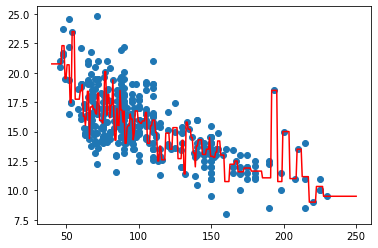

In [171]:
y_hat = []

t = np.linspace(40, 250, 300)

for x in t:
    #print(x)
    y_hat.append(knn(auto.horsepower, auto.acceleration, x, K = 1))

plt.scatter(auto.horsepower, auto.acceleration)
plt.plot(t, y_hat, color = 'red')


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])



-----
### Congratulations, we're done!

Written by Dr. Liz Munch, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [11]:
##ANSWER## 
# This cell gets the name of the current notebook. Needs a sec
# to run before it works

from jupyterinstruct import InstructorNotebook
this_notebook = InstructorNotebook.getname()

print(this_notebook)

##ANSWER## 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

None


In [12]:
##ANSWER##
#This cell runs the converter which removes ANSWER fields, renames the notebook and cleans out output fields. 

studentnotebook = InstructorNotebook.makestudent(this_notebook)
InstructorNotebook.validate(studentnotebook)

Myfilename 


IndexError: list index out of range